In [ ]:
from preprocessing import *
from main import *
import torch
import os
import shutil
if os.path.exists('model'):
    shutil.rmtree("model")

In [2]:
# set your device and visible devices, prefer cuda
os.environ["CUDA_VISIBLE_DEVICES"]="2"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'DEVICE: {device}')

# set your parameters based on hyperparameter tuning results
chf_mini_params = {'depth': 1, 'grid': 8, 'k': 8, 'lamb': 3.3619635794339965e-07, 'lamb_entropy': 2.078997799175118, 'lr_1': 1.25, 'lr_2': 1.25, 'steps': 20}

# load your dataset from preprocessing
dataset = get_chf(cuda=True)

# define your NKAN object
chf_kan = NKAN(dataset, 42, device, chf_mini_params)

DEVICE: cuda
checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 5.97e-03 | test_loss: 5.30e-03 | reg: 1.47e+01 | : 100%|█| 20/20 [00:07<00:00,  2.51it


saving model version 0.1
Model trained.
saving model version 0.2


| train_loss: 6.35e-03 | test_loss: 5.41e-03 | reg: 1.24e+01 | : 100%|█| 20/20 [00:06<00:00,  2.90it


saving model version 0.3
Model pruned and re-trained.


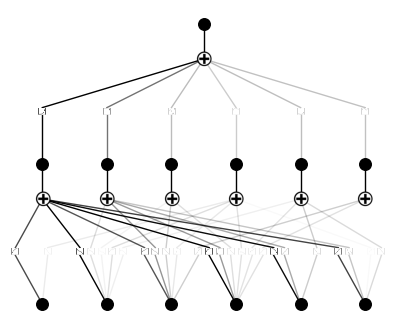

In [3]:
# initialize and train your model
model = chf_kan.get_model(save=True, save_as='CHF_mini')
model.plot()

In [4]:
chf_kan.get_metrics(model, 'CHF_mini')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,CHF,46.149,3.5088,5102.7256,71.4334,6.2759,0.9971


In [5]:
# do a quick refinement loop on your model 
#model = KAN.loadckpt('models/CHF_mini')
#chf_kan.refine(model, grids=[50])

In [6]:
chf_kan.get_equation(model, 'CHF_mini_s0', simple=0, metrics=True)

fixing (0,0,0) with log, r2=0.9988591012767265, c=2
fixing (0,0,1) with 0
fixing (0,0,2) with 0
fixing (0,0,3) with arctan, r2=0.9966293103377913, c=4
fixing (0,0,4) with 0
fixing (0,0,5) with 0
fixing (0,1,0) with tan, r2=0.9995336909259995, c=3
fixing (0,1,1) with arctan, r2=0.9781875012144606, c=4
fixing (0,1,2) with arctanh, r2=0.9699874288035848, c=4
fixing (0,1,3) with tan, r2=0.9876299770536889, c=3
fixing (0,1,4) with gaussian, r2=0.4687399509413316, c=3
fixing (0,1,5) with 0
fixing (0,2,0) with arctanh, r2=0.9891461692272253, c=4
fixing (0,2,1) with tan, r2=0.9979801641150339, c=3
fixing (0,2,2) with arctan, r2=0.9979132014030508, c=4
fixing (0,2,3) with cos, r2=0.9788575207835006, c=2
fixing (0,2,4) with 0
fixing (0,2,5) with gaussian, r2=0.997633793242345, c=3
fixing (0,3,0) with tan, r2=0.9981764728231013, c=3
fixing (0,3,1) with gaussian, r2=0.9975679751853489, c=3
fixing (0,3,2) with arctan, r2=0.9840684261284132, c=4
fixing (0,3,3) with tanh, r2=0.9825300890060904, c=3
f

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
from sys import getsizeof

In [ ]:
getsizeof(formula)

64